In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
NX=nx=50
NV=49
x= np.zeros(NX+2)
xc=np.zeros(NV+2)
u=np.zeros(NX+2)
f=np.zeros(NV+2)
fnew=np.zeros(NV+2)

NT   = 10001
nout = 500

dif = 1.0
vel = 0.1
sigma = NX/10
main = []

dx = 1.0
dt = 0.1
for j in range(1,NX+1):
    xj  = (j-1)*dx/float(NX-1)
    g   = (1.0-xj*xj)
    u[j] = vel*g
    x[j] = x[j-1]+dx*(0.5+u[j]/vel)   
for j in range(1,NV+1):
    xc[j] = 0.5*(x[j]+x[j+1])
    xj    = (x[j]-x[NX/2])/sigma
    f[j]  = np.exp(-0.5*xj*xj)

main.append(np.copy(f))
for it in range(1,NT):
    for j in range(2,NV):
        dxw = x[j]-x[j-1]
        dxc = x[j+1]-x[j]
        dxe = x[j+2]-x[j+1]
        ae = dxc/(dxc+dxe)
        aw = dxc/(dxc+dxw)

#c east/west surface values
        fw = f[j]*(1.0-aw)+aw*f[j-1]
        fe = f[j]*(1.0-ae)+ae*f[j+1]
#c velocity is node centered (edges)
        uw = u[j]
        ue = u[j+1]
        Aflux_e = -ue*fe
        Aflux_w = -uw*fw
# c diffusion
        Dflux_w = dif*(f[j]-f[j-1])/(xc[j]-xc[j-1])
        Dflux_e = dif*(f[j+1]-f[j])/(xc[j+1]-xc[j])

        flux_e  = Aflux_e + Dflux_e 
        flux_w  = Aflux_w + Dflux_w 

        fnew[j] = f[j] + (flux_e-flux_w)*dt/dxc

        
# c left boundary j=1
    dxc = x[2]-x[1]
    dxe = x[3]-x[2]
    ae = dxc/(dxc+dxe)
    fe = f[1]*(1-ae)+ae*f[2]
    ue = u[2]
    Aflux_e = -ue*fe
    Dflux_e = dif*(f[2]-f[1])/(xc[2]-xc[1])
#     c no flux from the west
    fnew[1] = f[1] + (Aflux_e+Dflux_e)*dt/dxc

#     c right  boundary j=nx-1
    dxc = x[nx]-x[nx-1]
    dxw = x[nx-1]-x[nx-2]
    aw = dxc/(dxc+dxw)
    fw = f[nx-1]*(1-aw)+aw*f[nx-2]
    uw = u[nx-1]
    Aflux_w = uw*fw
    Dflux_w = dif*(f[nx-1]-f[nx-2])/(xc[nx-1]-xc[nx-2])
#     c no flux from the east
    fnew[nx-1] = f[nx-1] -(Aflux_w+Dflux_w)*dt/dxc
#     c =========================================================
#     c new step
    for j in range(1,NV+1):
        f[j] = fnew[j]
    main.append(np.copy(f))

    

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


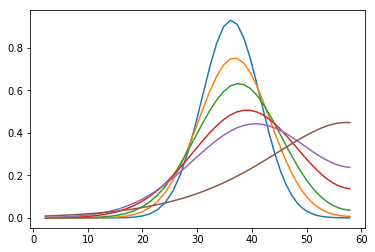

In [2]:
main = np.array(main)
plt.plot(xc[1:-1],main[20,1:-1])
plt.plot(xc[1:-1],main[100,1:-1])
plt.plot(xc[1:-1],main[200,1:-1])
plt.plot(xc[1:-1],main[400,1:-1])
plt.plot(xc[1:-1],main[600,1:-1])
plt.plot(xc[1:-1],main[8000,1:-1])

In [12]:
np.shape(main)

(5001, 51)